Team members

 D22004 - Akshay kumar
 
 D22032 - P.A.Benwin
 
 D22033 - Poojitha Reddy

In [1]:
#inserting libraries
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV,train_test_split 
from sklearn.metrics import roc_auc_score,f1_score,accuracy_score,classification_report,confusion_matrix,precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

## 1.Reading the file 

In [2]:
df = pd.read_csv("SMSSpamCollection.csv",header=None)
df.columns=['Labels','sms']
df.head(5)

,Labels,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 2.Text preprocessing

In [3]:
#removing stopwords - because it is present in both spam and ham which does not differentiate the document         
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words("english")
len(stop_words)

for i in range (len(df.sms)):
    df.sms[i]= " ".join([w for w in df.sms[i].split() if w not in stop_words])
    
#removing whitespaces - whitespaces is not required it will consider as characters
for i in range(len(df.sms)):
    df.sms[i] = df.sms[i].replace("  ", " ").strip()  
    
#lemmitization - it gives contextual meaning and in stemming it does not give proper meaning hence we used lemmatization    
lemmatizer = WordNetLemmatizer()
lemmatizer 
for i in range(len(df)):
    lemma=df.sms[i]
    df.sms[i]=" ".join([lemmatizer.lemmatize(word ,pos="v") for word in nltk.word_tokenize(lemma)])
    
df.head(5)    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\benwi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Labels,sms
0,ham,"Go jurong point , crazy .. Available bugis n g..."
1,ham,Ok lar ... Joking wif u oni ...
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say early hor ... U c already say ...
4,ham,"Nah I think go usf , live around though"


## 3.Data exploration

In [4]:
!pip install wordcloud

In [5]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [6]:
ham = ""
spam = ""

for i in range(len(df.sms)):
    if df.Labels[i] == "ham":
        ham = ham + df.sms[i]
    else:
        spam = spam + df.sms[i]

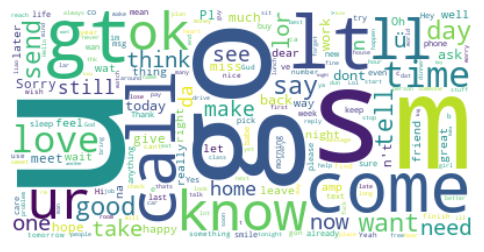

In [7]:
#Wordcloud for ham tweets
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(ham)
plt.figure(figsize=(6,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

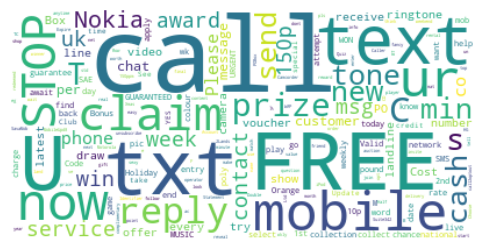

In [8]:
#Wordcloud for spam tweets
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(spam)
plt.figure(figsize=(6,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### COMMENT - we separated the words as spam and ham ,then used word cloud for see the frequently occuring words in spam and ham

## 4.Vectorization

### 1. (vectorization using TF)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
#using count vectoroizer to create a document-term matrix
cv = CountVectorizer()
X = cv.fit_transform(df.sms)

In [11]:
X = X.toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [12]:
#The word list
names = cv.get_feature_names()

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
len(names)

7983

In [47]:
#Converting the document-term matrix to a dataframe
DTM = pd.DataFrame(X, columns=names)
DTM

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5572,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
DTM.drop(columns="Labels",inplace=True)

In [38]:
DTM = pd.concat([DTM,df['Labels']],axis=1)
DTM

,150p,50,all,already,also,always,amp,and,anything,are,...,word,work,would,www,ya,yeah,yes,you,your,Labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,spam
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,spam
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
5571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
5572,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham


### COMMENT - It shows the number of times the words have repeated in the document

### 2. (vectorization using TF-IDF)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer=TfidfVectorizer()
tfidf_vectors=tfidf_vectorizer.fit_transform(df.sms)

names=tfidf_vectorizer.get_feature_names()

tfidf_vectors=tfidf_vectors.toarray()
tfidf_vectors=pd.DataFrame(tfidf_vectors,columns=names)

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [16]:
tfidf_vectors

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### COMMENT -we are using TF-IDF so that it considers the importance of the rare words

### 3. vectorization(doc-to-vec model using Google’s word-to-vec model)

In [17]:
from gensim.models import KeyedVectors

In [18]:
embeddings = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary = True)

In [19]:
embeddings

In [20]:
embeddings.index_to_key

['</s>',
 'in',
 'for',
 'that',
 'is',
 'on',
 '##',
 'The',
 'with',
 'said',
 'was',
 'the',
 'at',
 'not',
 'as',
 'it',
 'be',
 'from',
 'by',
 'are',
 'I',
 'have',
 'he',
 'will',
 'has',
 '####',
 'his',
 'an',
 'this',
 'or',
 'their',
 'who',
 'they',
 'but',
 '$',
 'had',
 'year',
 'were',
 'we',
 'more',
 '###',
 'up',
 'been',
 'you',
 'its',
 'one',
 'about',
 'would',
 'which',
 'out',
 'can',
 'It',
 'all',
 'also',
 'two',
 'after',
 'first',
 'He',
 'do',
 'time',
 'than',
 'when',
 'We',
 'over',
 'last',
 'new',
 'other',
 'her',
 'people',
 'into',
 'In',
 'our',
 'there',
 'A',
 'she',
 'could',
 'just',
 'years',
 'some',
 'U.S.',
 'three',
 'million',
 'them',
 'what',
 'But',
 'so',
 'no',
 'like',
 'if',
 'only',
 'percent',
 'get',
 'did',
 'him',
 'game',
 'back',
 'because',
 'now',
 '#.#',
 'before',
 'company',
 'any',
 'team',
 'against',
 'off',
 'This',
 'most',
 'made',
 'through',
 'make',
 'second',
 'state',
 'well',
 'day',
 'season',
 'says',
 'w

In [21]:
len(embeddings.index_to_key)

3000000

In [22]:
def vec(a):
    return(embeddings[a])

In [23]:
# Converting each document into a vector
word_embeddings_list = {}

for doc in df.sms:
    vec_list = []
    for word in doc.split():
        if word in embeddings.index_to_key:
            vec_list.append(vec(word))
    word_embeddings_list[doc] = np.sum(np.array(vec_list),axis=0)

In [64]:
#Word2Vec DataFrame
sms_df = pd.DataFrame.transpose(pd.DataFrame(word_embeddings_list))
sms_df

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
"Go jurong point , crazy .. Available bugis n great world la e buffet ... Cine get amore wat ...",-0.094177,0.691162,-0.296143,2.675049,-0.247833,1.096985,0.935516,-1.197266,0.353943,1.270203,...,0.124512,0.183777,-1.508545,1.416565,0.477966,-0.348999,0.238647,-0.906067,-0.291992,0.682037
Ok lar ... Joking wif u oni ...,-0.668823,0.460327,0.262329,0.418625,-0.308594,0.160645,-0.375160,-0.434265,-0.348022,0.393799,...,0.634033,0.488525,-0.844727,-0.117432,-0.722900,-1.498535,-0.868408,-0.510345,-0.471924,0.575439
Free entry 2 wkly comp win FA Cup final tkts 21st May 2005 . Text FA 87121 receive entry question ( std txt rate ) T & C 's apply 08452810075over18 's,-1.310326,-1.227264,-1.509974,0.787140,0.388458,-0.722908,-0.788330,-2.467468,1.640625,1.913940,...,0.327759,-0.317627,-1.923706,-0.248230,-0.516586,-0.071777,-1.658447,-1.066147,-2.756454,0.415527
U dun say early hor ... U c already say ...,-0.680969,0.421967,1.235107,0.971741,-0.895020,-0.200447,-0.828247,-1.348389,-0.004395,0.962891,...,0.267822,0.571289,-0.235413,-0.142090,-0.572754,-0.915527,-0.750069,-0.082031,0.164062,1.489136
"Nah I think go usf , live around though",0.088013,0.208130,0.274170,1.451660,-0.004272,0.269714,0.407593,-0.748451,0.488647,0.737139,...,-0.230774,1.014160,-1.096191,0.677124,-0.567108,-0.843506,-0.006348,-0.708801,0.816525,-0.509644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"This 2nd time try 2 contact u. U £750 Pound prize . 2 claim easy , call 087187272008 NOW1 ! Only 10p per minute . BT-national-rate .",-0.339600,0.171265,0.794357,0.896118,-0.220955,0.795120,0.692169,-1.035400,1.328857,0.829712,...,-0.126801,0.637146,-1.271881,-0.159607,-0.702393,-1.037842,-0.616211,-0.485367,-0.136574,-0.474976
Will ü b go esplanade fr home ?,0.287354,0.578125,0.635437,0.879608,-0.351074,-0.078156,-0.526245,-0.976282,-0.206665,0.147966,...,-0.511230,0.847900,-0.932022,0.570251,-0.270752,-0.786377,-0.464722,-0.828613,-0.042480,0.599792
"Pity , * mood that . So ... any suggestions ?",-0.010223,0.618652,0.508057,0.392578,-0.847168,0.377441,-0.027405,-0.437653,0.629395,0.369629,...,-0.889099,0.400818,0.095047,-0.213440,0.147034,-0.296387,0.336182,-0.212372,0.011963,-0.157471
The guy bitch I act like i 'd interest buy something else next week give us free,1.150635,0.242279,0.515533,2.332764,-0.895873,0.486450,1.197327,-1.260910,0.949646,1.832642,...,-0.205456,1.674805,-2.473389,0.036774,-0.703247,-0.667324,0.282562,-0.681074,-0.589363,-1.429504


### COMMENT -here we are using word embeddings which gives vector representation for each word.These embeddings can be used because it improves performance compared to traditionals methods.  

## 5.Dimension reduction

#### 1.PCA on TF

In [48]:
# Importing the PCA model, instantiating, training and transforming the data
from sklearn.decomposition import PCA
pca = PCA()
principalcomponents = pca.fit_transform(DTM)

# Determining the cumulative percentage of the variance explained by the prinicpal components
cum_var_arr = np.cumsum((pca.explained_variance_*100) / np.sum(pca.explained_variance_))

# Determining the number of principal components that explains the 
count=0
for i in cum_var_arr:
    if i<=95:
        count+=1
    else:
        break

# Creating the dataframe with the principal components
principalDF = pd.DataFrame(data=principalcomponents)
principalDF.head(3)
# Subsetting the dataframe based on the selected no.of principal components
#pca_tf_df = principalDF.iloc[:,:count]

,0,1,2,3,4,5,6,7,8,9,...,5564,5565,5566,5567,5568,5569,5570,5571,5572,5573
0,-0.059149,-0.313441,0.507511,-0.078994,-0.870671,0.432694,-0.080529,0.100461,-0.309492,0.278088,...,7.079484e-24,-9.300281e-25,3.316162e-24,4.314697e-37,5.064258e-24,7.592359e-22,6.393240e-24,-3.207180e-37,1.828990e-37,1.940922e-39
1,-0.112580,-0.197963,-0.292203,-0.140363,0.033611,0.013872,0.048182,0.026400,-0.121116,0.036505,...,7.079484e-24,-9.300281e-25,3.316162e-24,1.068099e-32,5.064258e-24,7.592359e-22,6.393240e-24,1.406858e-32,-7.322567e-33,4.325631e-35
2,-0.139148,0.494791,0.150628,-0.655489,-0.010028,-0.008646,0.180725,-0.973910,0.425530,-0.044873,...,-2.610035e-19,2.543996e-19,5.787601e-19,-1.211527e-18,1.365131e-19,-1.992080e-19,-1.440836e-19,3.213603e-19,-5.858981e-20,-4.428116e-22


In [37]:
principalDF.drop(columns="Labels",inplace=True)

In [49]:
principalDF = pd.concat([principalDF,df['Labels']],axis=1)
principalDF

,0,1,2,3,4,5,6,7,8,9,...,5565,5566,5567,5568,5569,5570,5571,5572,5573,Labels
0,-0.059149,-0.313441,0.507511,-0.078994,-0.870671,0.432694,-0.080529,0.100461,-0.309492,0.278088,...,-9.300281e-25,3.316162e-24,4.314697e-37,5.064258e-24,7.592359e-22,6.393240e-24,-3.207180e-37,1.828990e-37,1.940922e-39,ham
1,-0.112580,-0.197963,-0.292203,-0.140363,0.033611,0.013872,0.048182,0.026400,-0.121116,0.036505,...,-9.300281e-25,3.316162e-24,1.068099e-32,5.064258e-24,7.592359e-22,6.393240e-24,1.406858e-32,-7.322567e-33,4.325631e-35,ham
2,-0.139148,0.494791,0.150628,-0.655489,-0.010028,-0.008646,0.180725,-0.973910,0.425530,-0.044873,...,2.543996e-19,5.787601e-19,-1.211527e-18,1.365131e-19,-1.992080e-19,-1.440836e-19,3.213603e-19,-5.858981e-20,-4.428116e-22,spam
3,-0.066753,-0.261006,-0.134161,0.053480,0.033345,0.061638,0.047862,0.051549,0.057259,-0.040516,...,-9.300281e-25,3.316162e-24,2.340782e-32,5.064258e-24,7.592359e-22,6.393240e-24,2.810743e-32,-1.159568e-32,-1.383262e-35,ham
4,-0.072935,-0.314309,-0.013017,0.144481,-0.212962,0.694897,0.041028,-0.211772,-0.270672,0.027199,...,8.752943e-20,-5.188448e-20,6.580175e-19,-1.657500e-19,1.773901e-20,-7.614239e-20,-3.741145e-19,2.379255e-19,4.149252e-22,ham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5569,-0.134003,1.246882,-0.358379,0.306417,-0.046142,0.179075,0.145294,0.516235,-0.064610,0.082462,...,-9.300281e-25,3.316162e-24,-7.976657e-34,5.064258e-24,7.592359e-22,6.393240e-24,8.006024e-33,-2.233288e-33,1.842440e-35,spam
5570,-0.091039,-0.321168,-0.047467,0.100468,-0.240067,0.712137,0.070517,-0.204010,-0.305083,0.051566,...,1.081499e-18,-5.224498e-19,-9.552829e-19,-5.585878e-19,4.013526e-19,-3.124238e-19,-2.412811e-19,4.461596e-19,-1.331793e-21,ham
5571,-0.085687,-0.174115,-0.219609,-0.034879,0.046205,-0.080003,0.007100,0.009055,0.040061,-0.012674,...,-9.300281e-25,3.316162e-24,1.428972e-33,5.064258e-24,7.592359e-22,6.393240e-24,2.449530e-32,-1.006104e-32,2.614819e-35,ham
5572,-0.039986,0.142348,0.119215,-0.237415,-0.065898,-0.061690,0.046589,-0.456287,0.318072,-0.441558,...,-9.300281e-25,3.316162e-24,-2.198973e-32,5.064258e-24,7.592359e-22,6.393240e-24,2.716394e-32,-1.733239e-32,-1.332596e-35,ham


In [50]:
principalDF.isnull().sum()

0         0
1         0
2         0
3         0
4         0
         ..
5570      0
5571      0
5572      0
5573      0
Labels    0
Length: 5575, dtype: int64

### Visualization of two PCA - (TF)

In [42]:
DTM

,150p,50,all,already,also,always,amp,and,anything,are,...,word,work,would,www,ya,yeah,yes,you,your,Labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,spam
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,spam
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
5571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham
5572,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ham


<AxesSubplot:xlabel='0', ylabel='1'>

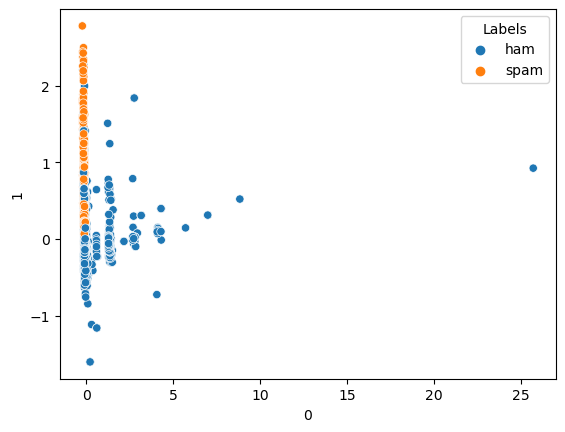

In [53]:
import seaborn as sns
sns.scatterplot(x = principalDF[0], y = principalDF[1], data = principalDF, hue = principalDF["Labels"])

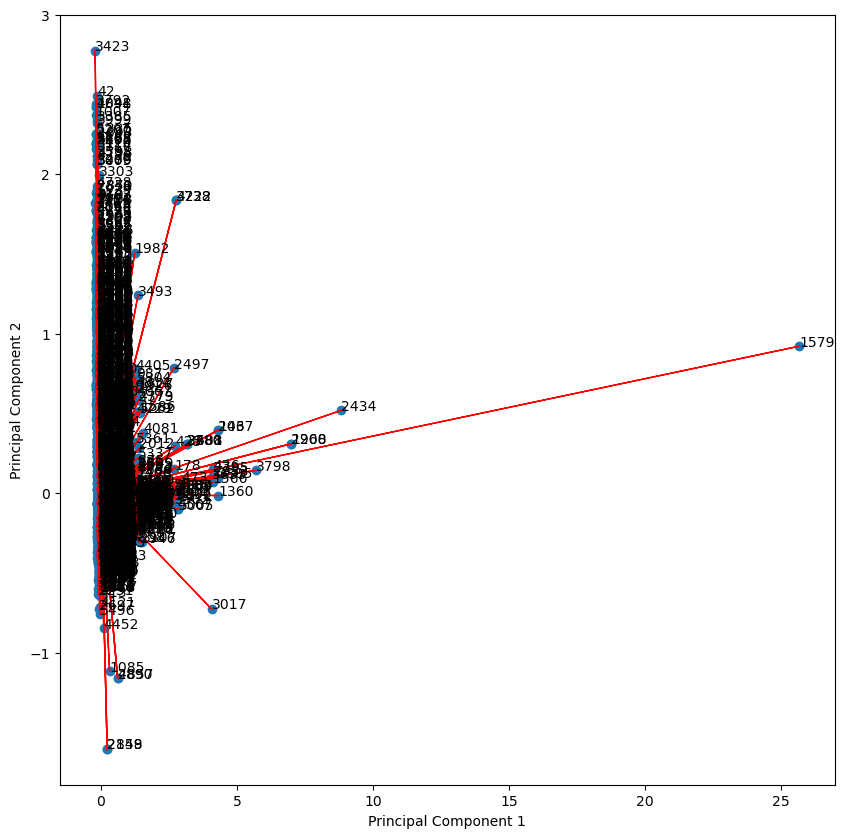

In [26]:
#Visualizing the words using PCs...(fancier version)

fig, ax = plt.subplots(figsize = (10, 10)) # Create custom size image  
ax.scatter(principalDF[0], principalDF[1]); # Plot a dot for each word
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# Add the word label over each dot in the scatter plot
for i in principalDF.index:
    ax.annotate(i, (principalDF.loc[i, 0], principalDF.loc[i, 1]))
# Print an arrow for each word
for i in principalDF.index:
    ax.arrow(0, 0, principalDF.loc[i, 0], principalDF.loc[i, 1], head_width=0.005, head_length=0.005, fc='r', ec='r', width = 1e-5)
plt.show()

#### 2.PCA on TF-IDF

In [27]:
# Importing the PCA model, instantiating, training and transforming the data
from sklearn.decomposition import PCA
pca = PCA()
principalcomponents = pca.fit_transform(tfidf_vectors)

# Determining the cumulative percentage of the variance explained by the prinicpal components
cum_var_arr = np.cumsum((pca.explained_variance_*100) / np.sum(pca.explained_variance_))

# Determining the number of principal components that explains the 
count=0
for i in cum_var_arr:
    if i<=95:
        count+=1
    else:
        break

# Creating the dataframe with the principal components
tfidf_vectors = pd.DataFrame(data=principalcomponents)
tfidf_vectors.head(3)
# Subsetting the dataframe based on the selected no.of principal components
#pca_tf_df = principalDF.iloc[:,:count]

,0,1,2,3,4,5,6,7,8,9,...,5564,5565,5566,5567,5568,5569,5570,5571,5572,5573
0,-0.031890,-0.014324,-0.017291,-0.064613,-0.042048,-0.018464,0.032883,0.102772,-0.036787,0.041973,...,7.022513e-25,4.271397e-25,-7.024099e-45,2.042334e-46,2.105770e-48,1.821331e-50,-2.039266e-50,-3.211986e-50,-6.017130e-52,1.181853e-52
1,-0.043414,0.250195,-0.001137,0.019752,-0.003357,-0.025410,-0.009782,-0.002168,-0.002201,-0.001347,...,7.022513e-25,4.271397e-25,-1.970862e-37,2.854827e-40,1.786691e-43,4.512603e-45,1.067763e-46,-1.022223e-46,1.235875e-46,8.959676e-47
2,-0.010132,-0.023538,-0.023895,0.070136,-0.071569,-0.053375,0.002359,-0.029977,-0.037152,0.021722,...,-2.958416e-20,1.059785e-19,-4.561774e-23,1.092004e-25,4.675836e-28,5.046919e-30,-3.178270e-36,2.135679e-36,4.760318e-35,-4.550274e-34


In [37]:
#tfidf_vectors.drop(columns="Labels",inplace=True)

In [54]:
tfidf_vectors = pd.concat([tfidf_vectors,df['Labels']],axis=1)
tfidf_vectors

,0,1,2,3,4,5,6,7,8,9,...,5565,5566,5567,5568,5569,5570,5571,5572,5573,Labels
0,-0.031890,-0.014324,-0.017291,-0.064613,-0.042048,-0.018464,0.032883,0.102772,-0.036787,0.041973,...,4.271397e-25,-7.024099e-45,2.042334e-46,2.105770e-48,1.821331e-50,-2.039266e-50,-3.211986e-50,-6.017130e-52,1.181853e-52,ham
1,-0.043414,0.250195,-0.001137,0.019752,-0.003357,-0.025410,-0.009782,-0.002168,-0.002201,-0.001347,...,4.271397e-25,-1.970862e-37,2.854827e-40,1.786691e-43,4.512603e-45,1.067763e-46,-1.022223e-46,1.235875e-46,8.959676e-47,ham
2,-0.010132,-0.023538,-0.023895,0.070136,-0.071569,-0.053375,0.002359,-0.029977,-0.037152,0.021722,...,1.059785e-19,-4.561774e-23,1.092004e-25,4.675836e-28,5.046919e-30,-3.178270e-36,2.135679e-36,4.760318e-35,-4.550274e-34,spam
3,-0.031700,0.007859,-0.005562,-0.038949,-0.010397,-0.020967,-0.047640,0.053747,0.019532,-0.083442,...,4.271397e-25,-2.578676e-37,-6.561637e-40,1.188135e-41,-3.924225e-44,1.010838e-46,9.008582e-47,-8.033619e-47,-3.542265e-47,ham
4,-0.030595,-0.017104,-0.000447,-0.075037,-0.007422,-0.003000,-0.054347,0.102879,0.012187,0.028056,...,-6.769636e-20,7.359143e-25,2.989015e-25,-5.199247e-28,1.132366e-30,-3.595781e-36,2.416231e-36,5.385653e-35,-5.148017e-34,ham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5569,0.059290,-0.027593,-0.034156,0.164066,-0.059349,0.052745,-0.036835,-0.004907,-0.109599,-0.055523,...,4.271397e-25,8.583170e-38,2.240172e-39,-2.360777e-42,3.306444e-45,1.033638e-46,5.656491e-47,8.070482e-48,-4.036716e-47,spam
5570,-0.032274,0.002344,-0.018540,-0.116827,-0.086731,0.162717,-0.068866,0.123325,0.001603,0.191451,...,-1.082580e-19,1.298986e-22,-4.623699e-25,-4.945551e-28,5.666778e-30,-5.524627e-36,3.712344e-36,8.274622e-35,-7.909514e-34,ham
5571,-0.025660,-0.018407,-0.009662,-0.017769,-0.002245,-0.036425,-0.022881,-0.029489,-0.000577,-0.050954,...,4.271397e-25,-2.112440e-38,2.594727e-39,1.781169e-41,3.489794e-44,-4.955307e-47,-3.657646e-47,-2.205294e-47,4.658984e-47,ham
5572,-0.018358,-0.028683,0.004873,0.018018,-0.036618,-0.051881,-0.001973,-0.008950,-0.025254,-0.041003,...,4.271397e-25,-1.141439e-36,-1.723889e-39,-1.616455e-41,2.590991e-44,-6.619787e-47,7.087151e-47,-7.684172e-47,1.394468e-47,ham


<AxesSubplot:xlabel='0', ylabel='1'>

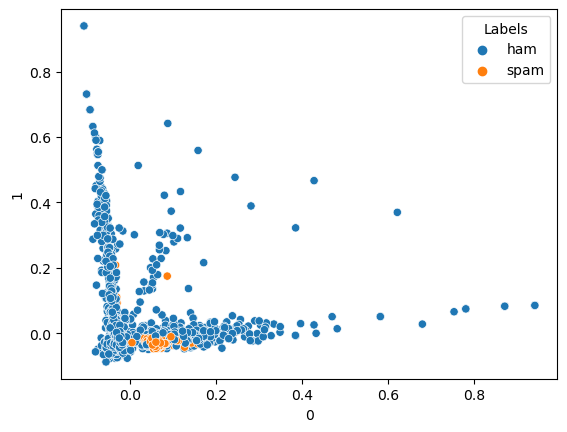

In [55]:
import seaborn as sns
sns.scatterplot(x = tfidf_vectors[0], y = tfidf_vectors[1], data = tfidf_vectors, hue = tfidf_vectors["Labels"])

### Visualization of two PCA - (TF-IDF)

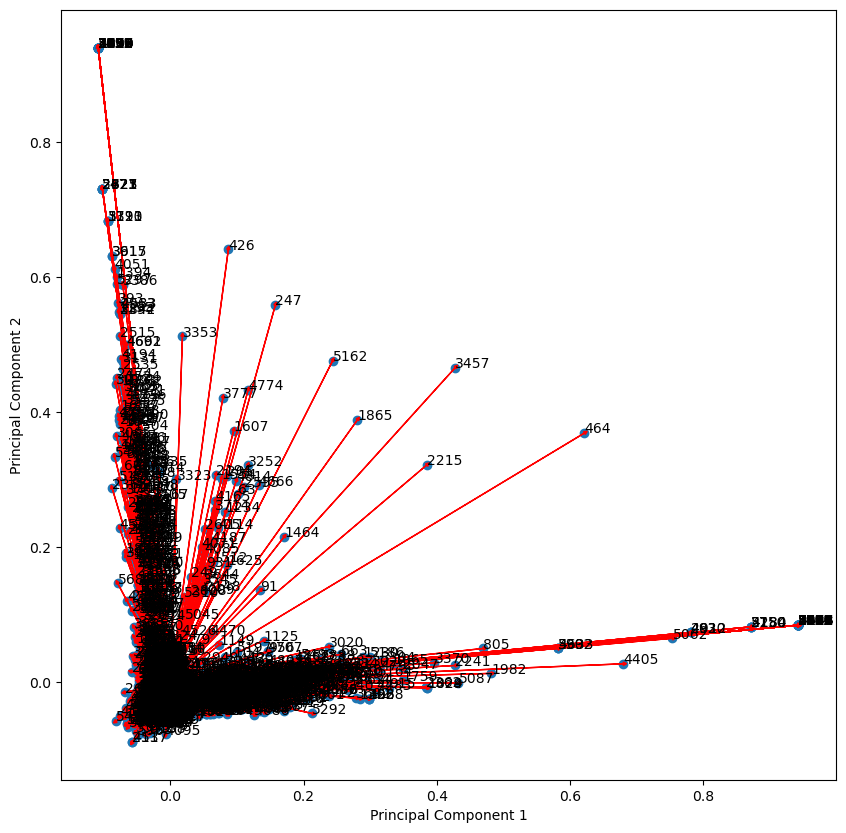

In [28]:
#Visualizing the words using PCs...(fancier version)

fig, ax = plt.subplots(figsize = (10, 10)) # Create custom size image  
ax.scatter(tfidf_vectors[0], tfidf_vectors[1]); # Plot a dot for each word
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# Add the word label over each dot in the scatter plot
for i in tfidf_vectors.index:
    ax.annotate(i, (tfidf_vectors.loc[i, 0], tfidf_vectors.loc[i, 1]))
# Print an arrow for each word
for i in tfidf_vectors.index:
    ax.arrow(0, 0, tfidf_vectors.loc[i, 0], tfidf_vectors.loc[i, 1], head_width=0.005, head_length=0.005, fc='r', ec='r', width = 1e-5)
plt.show()

#### 3.PCA on word to vec

In [73]:
# # Importing the PCA model, instantiating, training and transforming the data
from sklearn.decomposition import PCA
pca = PCA()
principalcomponents = pca.fit_transform(sms_df)

# Determining the cumulative percentage of the variance explained by the prinicpal components
cum_var_arr = np.cumsum((pca.explained_variance_*100) / np.sum(pca.explained_variance_))

# Determining the number of principal components that explains the 
count=0
for i in cum_var_arr:
    if i<=95:
        count+=1
    else:
        break
print('Number of principal components explaining 95% of the variance is:',count)

# Creating the dataframe with the principal components
principalDf3 = pd.DataFrame(data=principalcomponents,index=sms_df.index)
principalDf3.head(3)
# Subsetting the dataframe based on the selected no.of principal components
principalDf4 = principalDf3.iloc[:,:count]

Number of principal components explaining 95% of the variance is: 180


In [72]:
principalDf4.head()

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
"Go jurong point , crazy .. Available bugis n great world la e buffet ... Cine get amore wat ...",3.144514,1.289096,2.910073,1.033160,-3.408961,0.964966,-1.264008,-0.781719,-1.944583,-2.406721,...,-0.758531,0.150958,0.655519,-0.528319,-0.244499,0.764649,0.172514,0.713316,-0.270366,0.187520
Ok lar ... Joking wif u oni ...,-2.108855,2.613187,1.341851,5.564814,-2.955150,0.558251,0.660063,0.546056,-0.309076,-0.291948,...,-0.010497,0.121431,-0.476151,0.338466,-0.061575,-0.062125,0.058548,-0.243506,0.172496,0.068354
Free entry 2 wkly comp win FA Cup final tkts 21st May 2005 . Text FA 87121 receive entry question ( std txt rate ) T & C 's apply 08452810075over18 's,8.244178,7.690966,5.778799,-6.182350,-3.660670,-2.863399,-4.883266,-3.737775,-1.460105,1.709091,...,0.668810,1.586965,-1.108127,-0.589451,-0.936954,0.992308,0.846962,0.964967,0.091129,-1.108418
U dun say early hor ... U c already say ...,-1.806105,2.319710,1.288054,2.774220,-0.042477,-0.336810,-1.795611,1.846667,-0.938888,0.943021,...,0.643431,0.019217,-0.039789,-0.028853,0.029588,0.385133,-0.205272,-0.036352,0.455035,-0.244448
"Nah I think go usf , live around though",-1.623126,-2.976366,-1.098993,1.205862,1.143506,-0.121110,-0.240664,-1.159854,-0.436519,0.033025,...,-0.018492,0.240628,-0.003018,-0.028439,0.329137,0.300347,0.154574,0.355482,0.035834,0.020862


pca = PCA()
principalcomponents = pca.fit_transform(sms_df)
principalDf3 = pd.DataFrame(data = principalcomponents,index = sms_df.index)
principalDf3

# Importing the PCA model, instantiating, training and transforming the data
from sklearn.decomposition import PCA
pca = PCA()
principalcomponents = pca.fit_transform(sms_df)

# Determining the cumulative percentage of the variance explained by the prinicpal components
cum_var_arr = np.cumsum((pca.explained_variance_*100) / np.sum(pca.explained_variance_))

# Determining the number of principal components that explains the 
count=0
for i in cum_var_arr:
    if i<=95:
        count+=1
    else:
        break

# Creating the dataframe with the principal components
principalDf3 = pd.DataFrame(data=principalcomponents)
principalDf3.head(3)
# Subsetting the dataframe based on the selected no.of principal components
#pca_tf_df = principalDF.iloc[:,:count]

In [56]:
sms_df = pd.concat([sms_df,df['Labels']],axis=1)
sms_df

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,Labels
0,3.144514,1.289096,2.910073,1.033160,-3.408961,0.964966,-1.264008,-0.781719,-1.944583,-2.406721,...,-0.414266,-0.257860,0.145005,-0.063615,-0.390504,-0.044535,-0.446530,-0.531115,0.213899,ham
1,-2.108855,2.613187,1.341851,5.564814,-2.955150,0.558251,0.660063,0.546056,-0.309076,-0.291948,...,-0.076819,0.141394,0.031795,-0.137028,0.325295,0.040154,0.154470,0.204993,0.107000,ham
2,8.244178,7.690966,5.778799,-6.182350,-3.660670,-2.863399,-4.883266,-3.737775,-1.460105,1.709091,...,0.593871,-0.197059,-0.397514,0.545777,0.581646,-0.150563,-0.208169,-0.184043,-0.391005,spam
3,-1.806105,2.319710,1.288054,2.774220,-0.042477,-0.336810,-1.795611,1.846667,-0.938888,0.943021,...,0.067631,0.050822,0.079005,-0.064133,-0.014519,-0.339177,0.170242,-0.244031,0.106775,ham
4,-1.623126,-2.976366,-1.098993,1.205862,1.143506,-0.121110,-0.240664,-1.159854,-0.436519,0.033025,...,0.031606,0.170555,0.073945,0.092094,0.036700,0.011528,0.068418,-0.109784,-0.007457,ham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,spam
5570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ham
5571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ham
5572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ham


In [ ]:
tfidf_vectors = pd.concat([tfidf_vectors,df['Labels']],axis=1)
tfidf_vectors

### Visualization of two PCA - (word to vec)

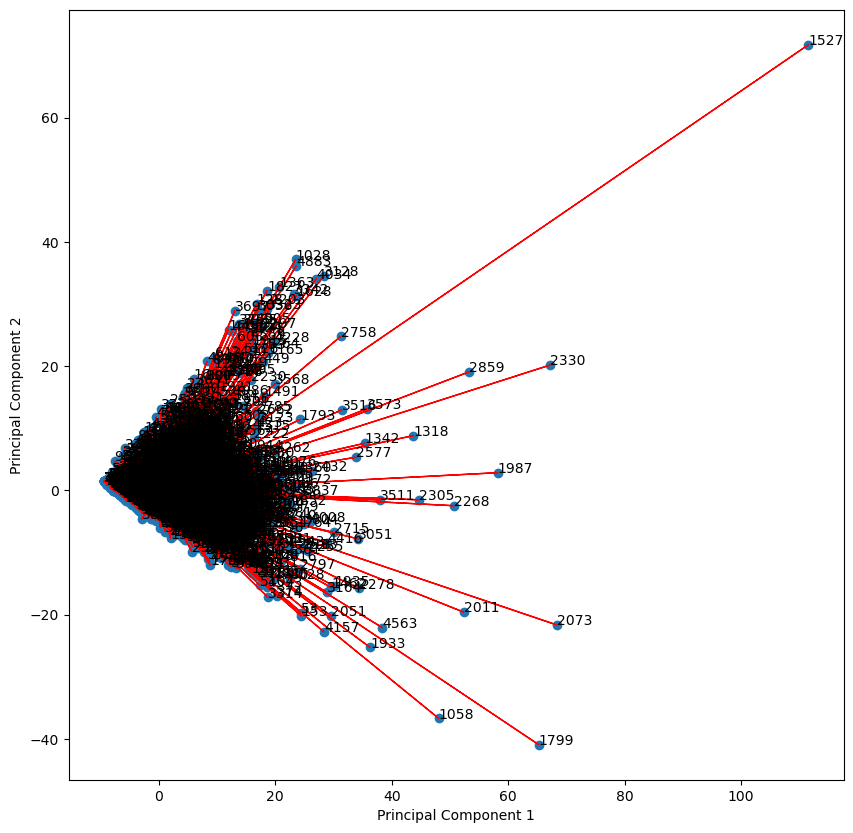

In [30]:
#Visualizing the words using PCs...(fancier version)

fig, ax = plt.subplots(figsize = (10, 10)) # Create custom size image  
ax.scatter(sms_df[0], sms_df[1]); # Plot a dot for each word
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# Add the word label over each dot in the scatter plot
for i in sms_df.index:
    ax.annotate(i, (sms_df.loc[i, 0], sms_df.loc[i, 1]))
# Print an arrow for each word
for i in sms_df.index:
    ax.arrow(0, 0, sms_df.loc[i, 0], sms_df.loc[i, 1], head_width=0.005, head_length=0.005, fc='r', ec='r', width = 1e-5)
plt.show()

### COMMENT - we had seen 133 columns were giving more than 95% variance when we applied PCA.
###  Used PCA to reduce the dimension

#### 4.p% of the documents on TF

In [31]:
for col in list(DTM):
    prop = DTM[col].sum()/DTM.shape[0]
    if prop*100 < 1:
        DTM = DTM.drop([col], axis = 1)

In [46]:
DTM.shape

(5574, 190)

In [47]:
DTM.head(5)

,150p,50,already,also,always,amp,and,anything,are,around,...,wish,word,work,would,www,ya,yeah,yes,you,your
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


#### 5.p% of the documents on TF-IDF

In [48]:
for col in list(tfidf_vectors):
    prop = tfidf_vectors[col].sum()/tfidf_vectors.shape[0]
    if prop*100 < 1:
        tfidf_vectors = tfidf_vectors.drop([col], axis = 1)

In [49]:
tfidf_vectors.shape

(5574, 14)

In [50]:
tfidf_vectors.head(5)

,call,come,get,go,good,gt,know,ll,lt,ok,send,time,ur,you
0,0.0,0.0,0.126096,0.136179,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.259633,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.224125,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


### COMMENT - in this dimensionality reduction we removed the words which have occured less than 1 % in the corpus.

### we have done PCA on TF,TF-IDF,word to vector and P% on TF and TF-IDF

## 6.Spam Filters

#### Model fitting on (1.PCA on TF)

In [147]:
df['Labels'].replace({'spam':1,'ham':0},inplace = True)

In [148]:
y = df["Labels"]

In [149]:
#For test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(principalDF, y, test_size = 0.2,random_state=30)
X_train,X_validate,y_train,y_validate = train_test_split(X_train,y_train,test_size=0.2,random_state=30)

In [200]:
# Decision tree classifier model

dtc = DecisionTreeClassifier()
# fit the model
dtc.fit(X_train,y_train)
# train the model 
y_validate_pred = dtc.predict(X_validate)
#metrics
accuracy = accuracy_score(y_validate,y_validate_pred)
f1 = f1_score(y_validate,y_validate_pred)
recall = recall_score(y_validate,y_validate_pred)
precision = precision_score(y_validate,y_validate_pred)
con_matrix = confusion_matrix(y_validate,y_validate_pred)
print("the accuracy score for decision tree validate model : ",accuracy)
print("the f1 score for decision tree validate model : ",f1)
print("the recall for decision tree validate model : ",recall)
print("the precision for decision tree validate model : ",precision)
print("confusion_matrix",con_matrix)


the accuracy score for decision tree validate model :  0.9002242152466368
the f1 score for decision tree validate model :  0.9424692954104719
the recall for decision tree validate model :  0.9516971279373369
the precision for decision tree validate model :  0.9334186939820742
confusion_matrix [[ 74  52]
 [ 37 729]]


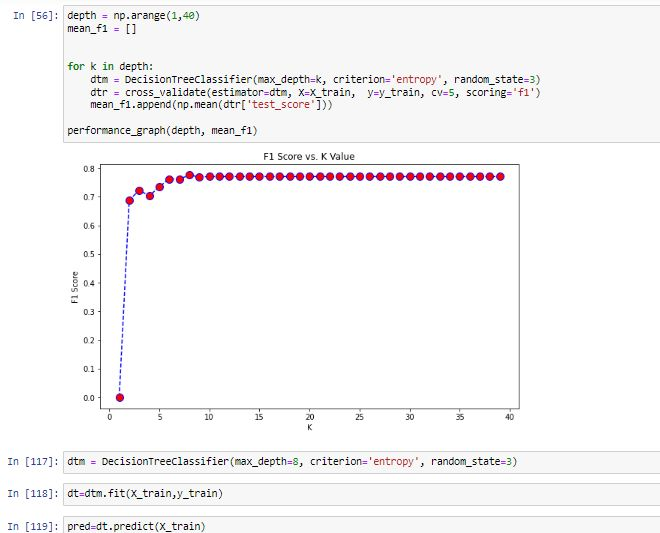

### hyperparameter tunning was done in another laptop and we had taken the max_depth as 8
### added screenshot above

In [197]:
# Decision tree classifier model

dtc = DecisionTreeClassifier(max_depth=8,criterion = 'entropy',random_state=3)
# fit the model
dtc.fit(X_train,y_train)
# train the model 
y_validate_pred = dtc.predict(X_validate)
#metrics
accuracy = accuracy_score(y_validate,y_validate_pred)
f1 = f1_score(y_validate,y_validate_pred)
recall = recall_score(y_validate,y_validate_pred)
precision = precision_score(y_validate,y_validate_pred)
con_matrix = confusion_matrix(y_validate,y_validate_pred)
print("the accuracy score for decision tree validate model : ",accuracy)
print("the f1 score for decision tree validate model : ",f1)
print("the recall for decision tree validate model : ",recall)
print("the precision for decision tree validate model : ",precision)
print("confusion_matrix",con_matrix)

the accuracy score for decision tree validate model :  0.9047085201793722
the f1 score for decision tree validate model :  0.944769330734243
the recall for decision tree validate model :  0.9490861618798956
the precision for decision tree validate model :  0.9404915912031048
confusion_matrix [[ 80  46]
 [ 39 727]]


In [151]:
# Random forest classifer model 

rfc = RandomForestClassifier()
# fit the model
rfc.fit(X_train,y_train)
# train the model
y_validate_r = rfc.predict(X_validate)

#metrics
accuracy = accuracy_score(y_validate,y_validate_r)
f1 = f1_score(y_validate,y_validate_r)
recall = recall_score(y_validate,y_validate_r)
precision = precision_score(y_validate,y_validate_r)
con_matrix = confusion_matrix(y_validate,y_validate_r)
print("the accuracy score for decision tree validate model : ",accuracy)
print("the f1 score for decision tree validate model : ",f1)
print("the recall for decision tree validate model : ",recall)
print("the precision for decision tree validate model : ",precision)
print("confusion_matrix",con_matrix)

the accuracy score for decision tree validate model :  0.9663677130044843
the f1 score for decision tree validate model :  0.9806451612903225
the recall for decision tree validate model :  0.9921671018276762
the precision for decision tree validate model :  0.9693877551020408
confusion_matrix [[102  24]
 [  6 760]]


In [152]:
# Adaboost classifier model 
abc = AdaBoostClassifier(random_state=30)
#fit the model
abc.fit(X_train,y_train)
#train the model
y_validate_a = abc.predict(X_validate)
#metrics
accuracy = accuracy_score(y_validate,y_validate_a)
f1 = f1_score(y_validate,y_validate_a)
recall = recall_score(y_validate,y_validate_a)
precision = precision_score(y_validate,y_validate_a)
con_matrix = confusion_matrix(y_validate,y_validate_a)
print("the accuracy score for decision tree validate model : ",accuracy)
print("the f1 score for decision tree validate model : ",f1)
print("the recall for decision tree validate model : ",recall)
print("the precision for decision tree validate model : ",precision)
print("confusion_matrix",con_matrix)

the accuracy score for decision tree validate model :  0.9641255605381166
the f1 score for decision tree validate model :  0.9793548387096774
the recall for decision tree validate model :  0.9908616187989556
the precision for decision tree validate model :  0.9681122448979592
confusion_matrix [[101  25]
 [  7 759]]


In [153]:
# bagging classifier model 
bag = BaggingClassifier(random_state=30)
#fit the model
bag.fit(X_train,y_train)
#train the model
y_validate_b = bag.predict(X_validate)
#metrices
accuracy = accuracy_score(y_validate,y_validate_b)
f1 = f1_score(y_validate,y_validate_b)
recall = recall_score(y_validate,y_validate_b)
precision = precision_score(y_validate,y_validate_b)
con_matrix = confusion_matrix(y_validate,y_validate_b)
print("the accuracy score for decision tree validate model : ",accuracy)
print("the f1 score for decision tree validate model : ",f1)
print("the recall for decision tree validate model : ",recall)
print("the precision for decision tree validate model : ",precision)
print("confusion_matrix",con_matrix)

the accuracy score for decision tree validate model :  0.9551569506726457
the f1 score for decision tree validate model :  0.9739243807040419
the recall for decision tree validate model :  0.9751958224543081
the precision for decision tree validate model :  0.97265625
confusion_matrix [[105  21]
 [ 19 747]]


#### model fitting on (2.PCA on TF-IDF)

In [154]:
df['Labels'].replace({'spam':1,'ham':0},inplace = True)

In [155]:
y = df["Labels"]

In [156]:
#For test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(principalDF2, y, test_size = 0.2,random_state=30)
X_train,X_validate,y_train,y_validate = train_test_split(X_train,y_train,test_size=0.2,random_state=30)

In [157]:
# Decision tree classifier model

dtc = DecisionTreeClassifier()
# fit the model
dtc.fit(X_train,y_train)
# train the model 
y_validate_pred1 = dtc.predict(X_validate)

accuracy = accuracy_score(y_validate,y_validate_pred1)
f1 = f1_score(y_validate,y_validate_pred1)
recall = recall_score(y_validate,y_validate_pred1)
precision = precision_score(y_validate,y_validate_pred1)
con_matrix = confusion_matrix(y_validate,y_validate_pred1)
print("the accuracy score for decision tree validate model : ",accuracy)
print("the f1 score for decision tree validate model : ",f1)
print("the recall for decision tree validate model : ",recall)
print("the precision for decision tree validate model : ",precision)
print("confusion_matrix",con_matrix)

the accuracy score for decision tree validate model :  0.9316143497757847
the f1 score for decision tree validate model :  0.959468438538206
the recall for decision tree validate model :  0.9425587467362925
the precision for decision tree validate model :  0.9769959404600812
confusion_matrix [[109  17]
 [ 44 722]]


In [158]:
# Random forest classifer model 

rfc = RandomForestClassifier()
# fit the model
rfc.fit(X_train,y_train)
# train the model
y_validate_r1 = rfc.predict(X_validate)

#metrics
accuracy = accuracy_score(y_validate,y_validate_r1)
f1 = f1_score(y_validate,y_validate_r1)
recall = recall_score(y_validate,y_validate_r1)
precision = precision_score(y_validate,y_validate_r1)
con_matrix = confusion_matrix(y_validate,y_validate_r1)
print("the accuracy score for decision tree validate model : ",accuracy)
print("the f1 score for decision tree validate model : ",f1)
print("the recall for decision tree validate model : ",recall)
print("the precision for decision tree validate model : ",precision)
print("confusion_matrix",con_matrix)

the accuracy score for decision tree validate model :  0.9159192825112108
the f1 score for decision tree validate model :  0.953329184816428
the recall for decision tree validate model :  1.0
the precision for decision tree validate model :  0.9108204518430439
confusion_matrix [[ 51  75]
 [  0 766]]


In [159]:
# Adaboost classifier model 
abc = AdaBoostClassifier(random_state=30)
#fit the model
abc.fit(X_train,y_train)
#train the model
y_validate_a1 = abc.predict(X_validate)
#metrics
accuracy = accuracy_score(y_validate,y_validate_a1)
f1 = f1_score(y_validate,y_validate_a1)
recall = recall_score(y_validate,y_validate_a1)
precision = precision_score(y_validate,y_validate_a1)
con_matrix = confusion_matrix(y_validate,y_validate_a1)
print("the accuracy score for decision tree validate model : ",accuracy)
print("the f1 score for decision tree validate model : ",f1)
print("the recall for decision tree validate model : ",recall)
print("the precision for decision tree validate model : ",precision)
print("confusion_matrix",con_matrix)

the accuracy score for decision tree validate model :  0.9641255605381166
the f1 score for decision tree validate model :  0.9793014230271668
the recall for decision tree validate model :  0.9882506527415144
the precision for decision tree validate model :  0.9705128205128205
confusion_matrix [[103  23]
 [  9 757]]


In [160]:
# bagging classifier model 
bag = BaggingClassifier(random_state=30)
#fit the model
bag.fit(X_train,y_train)
#train the model
y_validate_b1 = bag.predict(X_validate)
#metrics
accuracy = accuracy_score(y_validate,y_validate_b1)
f1 = f1_score(y_validate,y_validate_b1)
recall = recall_score(y_validate,y_validate_b1)
precision = precision_score(y_validate,y_validate_b1)
con_matrix = confusion_matrix(y_validate,y_validate_b1)
print("the accuracy score for decision tree validate model : ",accuracy)
print("the f1 score for decision tree validate model : ",f1)
print("the recall for decision tree validate model : ",recall)
print("the precision for decision tree validate model : ",precision)
print("confusion_matrix",con_matrix)

the accuracy score for decision tree validate model :  0.9618834080717489
the f1 score for decision tree validate model :  0.977922077922078
the recall for decision tree validate model :  0.9830287206266318
the precision for decision tree validate model :  0.9728682170542635
confusion_matrix [[105  21]
 [ 13 753]]


#### model fitting on (3.PCA on word to vec)

In [177]:
sms_df=sms_df.reset_index()

In [178]:
sms_df['index']

0          0
1          1
2          2
3          3
4          4
        ... 
5148    5148
5149    5149
5150    5150
5151    5151
5152    5152
Name: index, Length: 5153, dtype: int64

In [179]:
sms_df["label"] =np.nan #Creating a new column for Avg rating and filling with null
sms_df

,index,0,1,2,3,4,5,6,7,8,...,124,125,126,127,128,129,130,131,132,label
0,0,2.442038,1.050005,1.919845,0.671984,2.416446,-0.335771,0.342768,-0.052961,-1.007265,...,-0.338721,0.393178,0.251783,0.418213,-0.324451,0.556755,-0.263446,0.663799,-0.123926,NaN
1,1,-1.700735,1.018108,1.420821,3.648543,1.312156,-0.653279,-0.640451,0.446512,0.287518,...,0.551383,0.061901,-0.465454,-0.119004,0.208388,-0.069666,0.046277,0.519344,0.152603,NaN
2,2,4.956854,4.486690,3.217638,-3.910241,2.883744,-2.960033,4.183760,-1.545742,1.995411,...,-0.448718,-0.127204,-0.708168,0.074843,0.039421,-0.196442,0.041178,-0.334031,-0.011997,NaN
3,3,-1.314905,0.289164,1.129113,1.912953,-0.207505,-0.312083,0.111183,-0.750100,1.116992,...,0.015887,0.497554,0.150560,0.217001,-0.205194,0.056995,0.070372,-0.070632,-0.235263,NaN
4,4,-0.847219,-2.237887,-0.597327,0.630159,-0.670498,0.543495,0.830607,0.339172,0.011937,...,-0.139431,0.028286,-0.188758,-0.142539,0.085288,-0.087086,0.039337,0.059735,-0.018243,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5148,5148,0.338644,0.846895,1.174161,-2.349839,-0.003148,-1.118023,1.414571,-2.239260,2.202705,...,-0.196316,0.000714,-0.260759,0.026861,0.287640,0.184810,0.054021,0.264553,-0.124949,NaN
5149,5149,-1.702388,1.298867,1.617453,0.514634,0.027817,-0.007403,-0.447070,-1.104198,1.135339,...,-0.308564,0.098545,0.163057,0.116371,0.303148,0.337299,0.077536,-0.045258,-0.044471,NaN
5150,5150,-3.064053,-0.087284,-0.266174,-0.248610,0.389747,0.808079,-0.389873,0.095437,0.377345,...,0.108741,0.148243,0.014779,0.008700,-0.182291,-0.108724,0.292733,0.194292,0.149115,NaN
5151,5151,3.741907,-3.611468,-2.006878,-1.778033,-1.373110,-0.009206,1.239732,0.119738,-0.164723,...,0.174882,0.471980,-0.236299,-0.363678,0.129809,0.165526,-0.315624,-0.013392,-0.142851,NaN


In [180]:
for i in range(len(df.sms)): #Filling the Avg column with respective Avg rating from original file
    for j in range(len(sms_df['index'])):
        if df['sms'][i]==sms_df['index'][j]:
            sms_df.iloc[j,301]=df['Labels'][j]           

In [181]:
sms_df.isnull().sum()

index       0
0           0
1           0
2           0
3           0
         ... 
129         0
130         0
131         0
132         0
label    5153
Length: 135, dtype: int64

In [182]:
# Renaming the columns
sms_df.rename(columns = {'index':'message'}, inplace = True)

In [183]:
sms_df.head()

,message,0,1,2,3,4,5,6,7,8,...,124,125,126,127,128,129,130,131,132,label
0,0,2.442038,1.050005,1.919845,0.671984,2.416446,-0.335771,0.342768,-0.052961,-1.007265,...,-0.338721,0.393178,0.251783,0.418213,-0.324451,0.556755,-0.263446,0.663799,-0.123926,NaN
1,1,-1.700735,1.018108,1.420821,3.648543,1.312156,-0.653279,-0.640451,0.446512,0.287518,...,0.551383,0.061901,-0.465454,-0.119004,0.208388,-0.069666,0.046277,0.519344,0.152603,NaN
2,2,4.956854,4.486690,3.217638,-3.910241,2.883744,-2.960033,4.183760,-1.545742,1.995411,...,-0.448718,-0.127204,-0.708168,0.074843,0.039421,-0.196442,0.041178,-0.334031,-0.011997,NaN
3,3,-1.314905,0.289164,1.129113,1.912953,-0.207505,-0.312083,0.111183,-0.750100,1.116992,...,0.015887,0.497554,0.150560,0.217001,-0.205194,0.056995,0.070372,-0.070632,-0.235263,NaN
4,4,-0.847219,-2.237887,-0.597327,0.630159,-0.670498,0.543495,0.830607,0.339172,0.011937,...,-0.139431,0.028286,-0.188758,-0.142539,0.085288,-0.087086,0.039337,0.059735,-0.018243,NaN


In [184]:
sms_df['label'].replace({'spam':1,'ham':0},inplace=True) 

In [185]:
W2V = sms_df.drop(["label","message"],axis=1)

In [186]:
y = sms_df["label"]

In [ ]:
#For test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(W2V, y, test_size = 0.2,random_state=30)
X_train,X_validate,y_train,y_validate = train_test_split(X_train,y_train,test_size=0.2,random_state=30)

In [187]:
# Decision tree classifier model

dtc = DecisionTreeClassifier()
# fit the model
dtc.fit(X_train,y_train)
# train the model 
y_validate_p1 = dtc.predict(X_validate)

accuracy = accuracy_score(y_validate,y_validate_p1)
f1 = f1_score(y_validate,y_validate_p1)
recall = recall_score(y_validate,y_validate_p1)
precision = precision_score(y_validate,y_validate_p1)
con_matrix = confusion_matrix(y_validate,y_validate_p1)
print("the accuracy score for decision tree validate model : ",accuracy)
print("the f1 score for decision tree validate model : ",f1)
print("the recall for decision tree validate model : ",recall)
print("the precision for decision tree validate model : ",precision)
print("confusion_matrix",con_matrix)

the accuracy score for decision tree validate model :  0.897982062780269
the f1 score for decision tree validate model :  0.9412524209167205
the recall for decision tree validate model :  0.9516971279373369
the precision for decision tree validate model :  0.9310344827586207
confusion_matrix [[ 72  54]
 [ 37 729]]


In [188]:
# Random forest classifer model 

rfc = RandomForestClassifier()
# fit the model
rfc.fit(X_train,y_train)
# train the model
y_validate_r11 = rfc.predict(X_validate)

#metrics
accuracy = accuracy_score(y_validate,y_validate_r11)
f1 = f1_score(y_validate,y_validate_r11)
recall = recall_score(y_validate,y_validate_r11)
precision = precision_score(y_validate,y_validate_r11)
con_matrix = confusion_matrix(y_validate,y_validate_r11)
print("the accuracy score for decision tree validate model : ",accuracy)
print("the f1 score for decision tree validate model : ",f1)
print("the recall for decision tree validate model : ",recall)
print("the precision for decision tree validate model : ",precision)
print("confusion_matrix",con_matrix)

the accuracy score for decision tree validate model :  0.9091928251121076
the f1 score for decision tree validate model :  0.9479768786127168
the recall for decision tree validate model :  0.9634464751958225
the precision for decision tree validate model :  0.9329962073324906
confusion_matrix [[ 73  53]
 [ 28 738]]


In [189]:
# Adaboost classifier model 
abc = AdaBoostClassifier(random_state=30)
#fit the model
abc.fit(X_train,y_train)
#train the model
y_validate_a11 = abc.predict(X_validate)
#metrics
accuracy = accuracy_score(y_validate,y_validate_a11)
f1 = f1_score(y_validate,y_validate_a11)
recall = recall_score(y_validate,y_validate_a11)
precision = precision_score(y_validate,y_validate_a11)
con_matrix = confusion_matrix(y_validate,y_validate_a11)
print("the accuracy score for decision tree validate model : ",accuracy)
print("the f1 score for decision tree validate model : ",f1)
print("the recall for decision tree validate model : ",recall)
print("the precision for decision tree validate model : ",precision)
print("confusion_matrix",con_matrix)

the accuracy score for decision tree validate model :  0.9002242152466368
the f1 score for decision tree validate model :  0.942985265855221
the recall for decision tree validate model :  0.9608355091383812
the precision for decision tree validate model :  0.9257861635220126
confusion_matrix [[ 67  59]
 [ 30 736]]


In [190]:
# bagging classifier model 
bag = BaggingClassifier(random_state=30)
#fit the model
bag.fit(X_train,y_train)
#train the model
y_validate_b11 = bag.predict(X_validate)
#metrics
accuracy = accuracy_score(y_validate,y_validate_b11)
f1 = f1_score(y_validate,y_validate_b11)
recall = recall_score(y_validate,y_validate_b11)
precision = precision_score(y_validate,y_validate_b11)
con_matrix = confusion_matrix(y_validate,y_validate_b11)
print("the accuracy score for decision tree validate model : ",accuracy)
print("the f1 score for decision tree validate model : ",f1)
print("the recall for decision tree validate model : ",recall)
print("the precision for decision tree validate model : ",precision)
print("confusion_matrix",con_matrix)

the accuracy score for decision tree validate model :  0.9047085201793722
the f1 score for decision tree validate model :  0.945337620578778
the recall for decision tree validate model :  0.9595300261096605
the precision for decision tree validate model :  0.9315589353612167
confusion_matrix [[ 72  54]
 [ 31 735]]


#### model fitting on (p% of the documents on TF)

In [161]:
df['Labels'].replace({'spam':1,'ham':0},inplace = True)

In [162]:
y = df["Labels"]

In [163]:
#For test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(DTM, y, test_size = 0.2,random_state=30)
X_train,X_validate,y_train,y_validate = train_test_split(X_train,y_train,test_size=0.2,random_state=30)

In [164]:
# Decision tree classifier model

dtc = DecisionTreeClassifier()
# fit the model
dtc.fit(X_train,y_train)
# train the model 
y_validate_pred2 = dtc.predict(X_validate)

#metrics
accuracy = accuracy_score(y_validate,y_validate_pred2)
f1 = f1_score(y_validate,y_validate_pred2)
recall = recall_score(y_validate,y_validate_pred2)
precision = precision_score(y_validate,y_validate_pred2)
con_matrix = confusion_matrix(y_validate,y_validate_pred2)
print("the accuracy score for decision tree validate model : ",accuracy)
print("the f1 score for decision tree validate model : ",f1)
print("the recall for decision tree validate model : ",recall)
print("the precision for decision tree validate model : ",precision)
print("confusion_matrix",con_matrix)

the accuracy score for decision tree validate model :  0.9517937219730942
the f1 score for decision tree validate model :  0.9719137818419332
the recall for decision tree validate model :  0.9712793733681462
the precision for decision tree validate model :  0.9725490196078431
confusion_matrix [[105  21]
 [ 22 744]]


In [165]:
# Random forest classifer model 

rfc = RandomForestClassifier()
# fit the model
rfc.fit(X_train,y_train)
# train the model
y_validate_r2 = rfc.predict(X_validate)

#metrics
accuracy = accuracy_score(y_validate,y_validate_r2)
f1 = f1_score(y_validate,y_validate_r2)
recall = recall_score(y_validate,y_validate_r2)
precision = precision_score(y_validate,y_validate_r2)
con_matrix = confusion_matrix(y_validate,y_validate_r2)
print("the accuracy score for decision tree validate model : ",accuracy)
print("the f1 score for decision tree validate model : ",f1)
print("the recall for decision tree validate model : ",recall)
print("the precision for decision tree validate model : ",precision)
print("confusion_matrix",con_matrix)

the accuracy score for decision tree validate model :  0.9663677130044843
the f1 score for decision tree validate model :  0.9804941482444733
the recall for decision tree validate model :  0.9843342036553525
the precision for decision tree validate model :  0.9766839378238342
confusion_matrix [[108  18]
 [ 12 754]]


In [166]:
# Adaboost classifier model 
abc = AdaBoostClassifier(random_state=30)
#fit the model
abc.fit(X_train,y_train)
#train the model
y_validate_a2 = abc.predict(X_validate)
#metrics 
accuracy = accuracy_score(y_validate,y_validate_a2)
f1 = f1_score(y_validate,y_validate_a2)
recall = recall_score(y_validate,y_validate_a2)
precision = precision_score(y_validate,y_validate_a2)
con_matrix = confusion_matrix(y_validate,y_validate_a2)
print("the accuracy score for decision tree validate model : ",accuracy)
print("the f1 score for decision tree validate model : ",f1)
print("the recall for decision tree validate model : ",recall)
print("the precision for decision tree validate model : ",precision)
print("confusion_matrix",con_matrix)

the accuracy score for decision tree validate model :  0.9607623318385651
the f1 score for decision tree validate model :  0.9773169151004536
the recall for decision tree validate model :  0.9843342036553525
the precision for decision tree validate model :  0.9703989703989704
confusion_matrix [[103  23]
 [ 12 754]]


In [169]:
# bagging classifier model 
bag = BaggingClassifier(random_state=30)
#fit the model
bag.fit(X_train,y_train)
#train the model
y_validate_b2 = bag.predict(X_validate)
#metrics
accuracy = accuracy_score(y_validate,y_validate_b2)
f1 = f1_score(y_validate,y_validate_b2)
recall = recall_score(y_validate,y_validate_b2)
precision = precision_score(y_validate,y_validate_b2)
con_matrix = confusion_matrix(y_validate,y_validate_b2)
print("the accuracy score for decision tree validate model : ",accuracy)
print("the f1 score for decision tree validate model : ",f1)
print("the recall for decision tree validate model : ",recall)
print("the precision for decision tree validate model : ",precision)
print("confusion_matrix",con_matrix)

the accuracy score for decision tree validate model :  0.9517937219730942
the f1 score for decision tree validate model :  0.9718402095612311
the recall for decision tree validate model :  0.9686684073107049
the precision for decision tree validate model :  0.9750328515111695
confusion_matrix [[107  19]
 [ 24 742]]


#### model fitting on (p% of the documents on TF-IDF)

In [170]:
df['Labels'].replace({'spam':1,'ham':0},inplace = True)

In [171]:
y = df["Labels"]

In [172]:
#For test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_vectors, y, test_size = 0.2,random_state=30)
X_train,X_validate,y_train,y_validate = train_test_split(X_train,y_train,test_size=0.2,random_state=30)

In [173]:
# Decision tree classifier model

dtc = DecisionTreeClassifier()
# fit the model
dtc.fit(X_train,y_train)
# train the model 
y_validate_pred3 = dtc.predict(X_validate)
#metrics
accuracy = accuracy_score(y_validate,y_validate_pred3)
f1 = f1_score(y_validate,y_validate_pred3)
recall = recall_score(y_validate,y_validate_pred3)
precision = precision_score(y_validate,y_validate_pred3)
con_matrix = confusion_matrix(y_validate,y_validate_pred3)
print("the accuracy score for decision tree validate model : ",accuracy)
print("the f1 score for decision tree validate model : ",f1)
print("the recall for decision tree validate model : ",recall)
print("the precision for decision tree validate model : ",precision)
print("confusion_matrix",con_matrix)

the accuracy score for decision tree validate model :  0.9013452914798207
the f1 score for decision tree validate model :  0.9431524547803617
the recall for decision tree validate model :  0.9530026109660574
the precision for decision tree validate model :  0.9335038363171355
confusion_matrix [[ 74  52]
 [ 36 730]]


In [174]:
# Random forest classifer model 

rfc = RandomForestClassifier()
# fit the model
rfc.fit(X_train,y_train)
# train the model
y_validate_r3 = rfc.predict(X_validate)

#metrics
accuracy = accuracy_score(y_validate,y_validate_r3)
f1 = f1_score(y_validate,y_validate_r3)
recall = recall_score(y_validate,y_validate_r3)
precision = precision_score(y_validate,y_validate_r3)
con_matrix = confusion_matrix(y_validate,y_validate_r3)
print("the accuracy score for decision tree validate model : ",accuracy)
print("the f1 score for decision tree validate model : ",f1)
print("the recall for decision tree validate model : ",recall)
print("the precision for decision tree validate model : ",precision)
print("confusion_matrix",con_matrix)

the accuracy score for decision tree validate model :  0.9091928251121076
the f1 score for decision tree validate model :  0.9479768786127168
the recall for decision tree validate model :  0.9634464751958225
the precision for decision tree validate model :  0.9329962073324906
confusion_matrix [[ 73  53]
 [ 28 738]]


In [175]:
# Adaboost classifier model 
abc = AdaBoostClassifier(random_state=30)
#fit the model
abc.fit(X_train,y_train)
#train the model
y_validate_a3 = abc.predict(X_validate)
#metrics
accuracy = accuracy_score(y_validate,y_validate_a3)
f1 = f1_score(y_validate,y_validate_a3)
recall = recall_score(y_validate,y_validate_a3)
precision = precision_score(y_validate,y_validate_a3)
con_matrix = confusion_matrix(y_validate,y_validate_a3)
print("the accuracy score for decision tree validate model : ",accuracy)
print("the f1 score for decision tree validate model : ",f1)
print("the recall for decision tree validate model : ",recall)
print("the precision for decision tree validate model : ",precision)
print("confusion_matrix",con_matrix)

the accuracy score for decision tree validate model :  0.9002242152466368
the f1 score for decision tree validate model :  0.942985265855221
the recall for decision tree validate model :  0.9608355091383812
the precision for decision tree validate model :  0.9257861635220126
confusion_matrix [[ 67  59]
 [ 30 736]]


In [176]:
# bagging classifier model 
bag = BaggingClassifier(random_state=30)
#fit the model
bag.fit(X_train,y_train)
#train the model
y_validate_b3 = bag.predict(X_validate)
#metrics
accuracy = accuracy_score(y_validate,y_validate_b3)
f1 = f1_score(y_validate,y_validate_b3)
recall = recall_score(y_validate,y_validate_b3)
precision = precision_score(y_validate,y_validate_b3)
con_matrix = confusion_matrix(y_validate,y_validate_b3)
print("the accuracy score for decision tree validate model : ",accuracy)
print("the f1 score for decision tree validate model : ",f1)
print("the recall for decision tree validate model : ",recall)
print("the precision for decision tree validate model : ",precision)
print("confusion_matrix",con_matrix)

the accuracy score for decision tree validate model :  0.9047085201793722
the f1 score for decision tree validate model :  0.945337620578778
the recall for decision tree validate model :  0.9595300261096605
the precision for decision tree validate model :  0.9315589353612167
confusion_matrix [[ 72  54]
 [ 31 735]]


#### CONCLUSION 
#### model fitting on PCA on TF  -  random forest classifer model gave best result . decision tree classifier,adaboosting,bagging model also gave somewhat good result



#### model fitting on PCA on TF-IDF  -  adaptive boosting model gave best result . decision tree classifier,random forest classifier,bagging model also gave somewhat good result

#### model fitting on PCA on word to vec  -  bagging model gave best result . decision tree classifier,random forest classifier,adaptive boosting  model also gave somewhat good result

#### model fitting on P% on TF  -  random forest classifer model gave best result . decision tree classifier,adaboosting,bagging model also gave somewhat good result

#### model fitting on P% on TF-IDF  -  random forest classifer model gave best result . decision tree classifier,adaboosting,bagging model also gave somewhat good result

#### from the above conclusion PCA on TF , PCA on TF-IDF is good model score
#### and P% on TF , P% on TF-IDF give somewhat better result
#### and PCA on word to vec gives bad results